In [71]:
from sklearn.datasets import load_breast_cancer

#loading dataset breast_cancer
breast_cancer = load_breast_cancer()

print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [72]:
#checking sample and target sizes
print(f"Sample Size: {breast_cancer.data.shape}")
print(f"Target Size: {breast_cancer.target.shape}")

Sample Size: (569, 30)
Target Size: (569,)


In [73]:
from sklearn.model_selection import train_test_split

#splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=11)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")
print(f"Percentage of data used for test: { X_test.shape[0] / breast_cancer.data.shape[0] :.2%}")

Train Shape: (426, 30)
Test Shape: (143, 30)
Percentage of data used for test: 25.13%


In [74]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

#this fits the data using the split from above
nb.fit(X=X_train, y=y_train)

#this tests the data using the split from above
predicted = nb.predict(X=X_test)
expected = y_test

In [75]:
#checking the predicted data against the expected data
wrong = [(p,e) for (p,e) in zip(predicted, expected) if p != e]

#these represent the results that were wrong
print(f'Wrong Predictions: {wrong}')

#calculates the accuracy of the test
print(f'Accuracy: {(y_test.size-len(wrong))/y_test.size:.2%}')

#another way to test accuracy using score method
print(f'Accuracy (using nb.score): {nb.score(X_test, y_test):.2%}')

Wrong Predictions: [(1, 0), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0)]
Accuracy: 95.10%
Accuracy (using nb.score): 95.10%


Confusion Matrix: 
[[44  6]
 [ 1 92]]


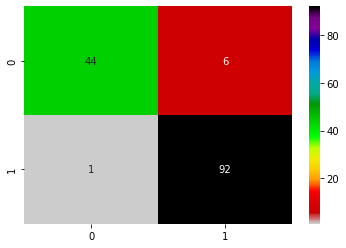

In [76]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

#confusion matrix for test data
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print(f'Confusion Matrix: \n{confusion}')

confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

#visualizing confusion matrix using colored heatmap
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')


In [77]:
from sklearn.metrics import classification_report

#classifcation report
names = [str(target_name) for target_name in breast_cancer.target_names]
print(classification_report(expected, predicted,target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



In [78]:
from sklearn.model_selection import KFold, cross_val_score

#kfold for gaussian_nb
kfold = KFold(n_splits=10, shuffle=True, random_state=11)
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

print(scores)
print(f'Mean Accuracy: {scores.mean():.2%}')
print(f'Accuracy Standard Deviation: {scores.std():.2%}')

[0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean Accuracy: 93.85%
Accuracy Standard Deviation: 2.75%


In [79]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs',multi_class='ovr',max_iter=10000),
    'SVC': SVC(gamma='scale')
}

In [80]:
#runs cross_fold_validation on all the estimators in order to determine which one is the best
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: mean accuracy={scores.mean():.2%} standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.85% standard deviation=2.75%
KNeighborsClassifier: mean accuracy=92.79% standard deviation=2.01%
  LogisticRegression: mean accuracy=95.08% standard deviation=3.02%
                 SVC: mean accuracy=91.92% standard deviation=3.52%


<p>As you can tell, Logistic Regression had a better accuracy than the other estimators</p>